In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/insurance_Data.csv')
df.shape

(103000, 7)

# **1. EDA**

### **1. Shape of the data**

In [3]:
# Finding the Shape of the Dataset
df.shape

(103000, 7)

- The Dataset Contains 103000 rows and 7 features.

In [4]:
# top 5 rows with columns
df.head()

,age,sex,bmi,children,smoker,region,charges
0,20.0,female,26.460966,0.0,yes,southwest,16884.92400
1,20.0,male,32.940494,2.0,no,southeast,1725.55230
2,28.0,male,33.688774,2.0,no,southeast,4449.46200
3,35.0,male,21.575745,1.0,no,NaN,21984.47061
4,34.0,male,27.939742,0.0,no,northwest,3866.85520


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### **2. Cleaning Data**

In [6]:
df = df.rename(columns = {'sex':'gender'})

In [7]:
df['age'] = df['age'].replace(0,np.nan)
df['bmi'] = df['bmi'].replace(0,np.nan)
df['charges'] = df['charges'].replace(0,np.nan)

### **3. Filling the missing Values**

In [8]:
df.isnull().sum()

,0
age,5144
gender,5158
bmi,5154
children,5153
smoker,5142
region,5146
charges,0


In [9]:
# Checking the percentage of missing values
df.isnull().sum()/len(df)*100

,0
age,4.994175
gender,5.007767
bmi,5.003883
children,5.002913
smoker,4.992233
region,4.996117
charges,0.000000


In [10]:
# Fillling the missing values by the method fillna()
df['age'] = df['age'].fillna(df['age'].median())
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['children'] = df['children'].fillna(df['children'].mean())
df['smoker'] = df['smoker'].fillna(df['smoker'].mode()[0])
df['region'] = df['region'].fillna(df['region'].mode()[0])

- The children column are filled with mean
- age,bmi are filled by median
- gender,smoker,region are filled with mode

In [11]:
# Checking After filling missing data
df.isnull().sum()

,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
charges,0


- No Missing records were exsisted after filling the columns

### **4. Droping Duplicated Values**

In [12]:
# Checking wheather the dataset is having duplicated values
df.duplicated().sum()

np.int64(3597)

In [13]:
# There are total 3632 duplicated values are present in the data
# So, Droping the duplicated values
df = df.drop_duplicates()

In [14]:
# After removing the duplicates checking the data
df.duplicated().sum()

np.int64(0)

In [15]:
# After removing the missing values and duplicated Values this is the shape of the dataset
# This is the final dataset Shape of the dataset
df.shape

(99403, 7)

- This is the final data of 99403 rows and 7 features Shape of the dataset

### **5. Value_counts and nunique**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99403 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       99403 non-null  float64
 1   gender    99403 non-null  object 
 2   bmi       99403 non-null  float64
 3   children  99403 non-null  float64
 4   smoker    99403 non-null  object 
 5   region    99403 non-null  object 
 6   charges   99403 non-null  float64
dtypes: float64(4), object(3)
memory usage: 6.1+ MB


In [17]:
num_col = df.select_dtypes(include = ['int64','float64']).columns

In [18]:
for i in num_col:
    print('Value counts:\n', df[i].value_counts())
    print('--------------------------------------------------------------------------')
    print('Unique counts:\n', df[i].unique())
    print('\n')
    #print('nunique',df[i].nunique())

Value counts:
 age
39.0    6783
18.0    5286
20.0    3197
19.0    2669
21.0    2531
47.0    2100
49.0    2064
51.0    2061
27.0    2033
48.0    2031
46.0    2003
22.0    2002
44.0    1991
50.0    1990
53.0    1978
55.0    1974
52.0    1973
23.0    1964
25.0    1963
28.0    1958
42.0    1946
45.0    1944
26.0    1943
24.0    1933
29.0    1929
43.0    1920
64.0    1914
31.0    1902
41.0    1890
56.0    1861
30.0    1857
54.0    1853
57.0    1851
33.0    1850
34.0    1842
32.0    1829
40.0    1823
37.0    1798
35.0    1788
38.0    1772
58.0    1754
36.0    1747
59.0    1728
60.0    1653
61.0    1642
62.0    1603
63.0    1280
Name: count, dtype: int64
--------------------------------------------------------------------------
Unique counts:
 [20. 28. 35. 34. 30. 39. 37. 62. 26. 25. 55. 18. 53. 54. 31. 59. 32. 19.
 63. 24. 61. 21. 33. 29. 42. 36. 22. 49. 38. 40. 56. 64. 27. 60. 41. 57.
 46. 23. 43. 50. 47. 51. 52. 44. 45. 48. 58.]


Value counts:
 bmi
30.413066    4403
22.448538       1
30.4

In [19]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,20.0,female,26.460966,0.0,yes,southwest,16884.92400
1,20.0,male,32.940494,2.0,no,southeast,1725.55230
2,28.0,male,33.688774,2.0,no,southeast,4449.46200
3,35.0,male,21.575745,1.0,no,southeast,21984.47061
4,34.0,male,27.939742,0.0,no,northwest,3866.85520


### **6. Outliers in the data**

<Axes: >

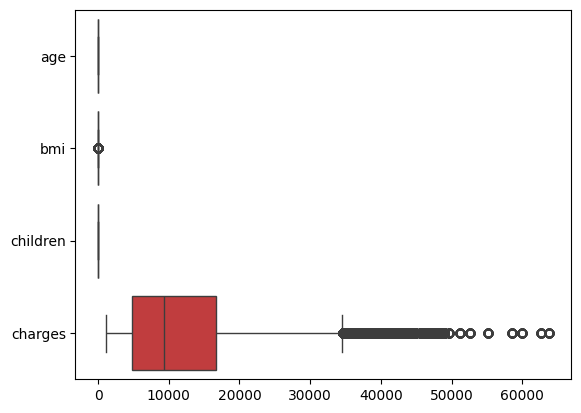

In [20]:
sns.boxplot(df,orient = 'h')

- The BMI should remains same because, it is one of the deciding feature for insurance so, we shouldn't change any value
- The charges column has outliers But, this is the target variable so, we need to remain it as unchange by outliers.

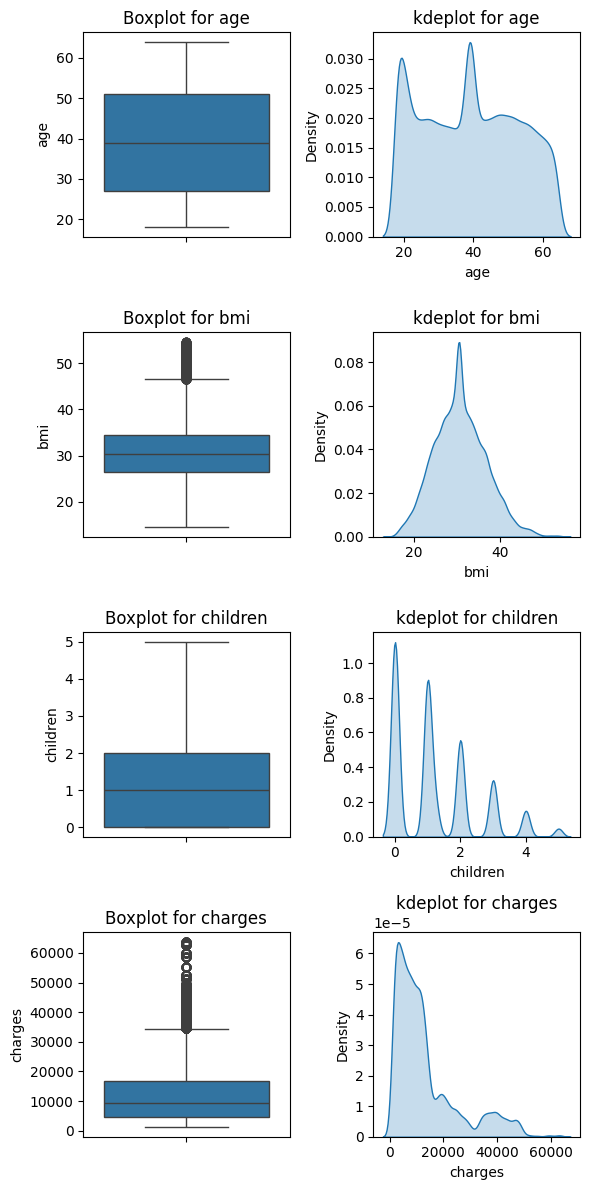

In [21]:
num_col = df.select_dtypes(include = ['int64','float64']).columns
l = len(num_col)
plt.figure(figsize=(6,l*3))
for i ,col in enumerate(num_col,1):
  # Boxplot
  plt.subplot(l,2,2*i-1)
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot for {col}')
  plt.tight_layout()
  # kdeplot
  plt.subplot(l,2,2*i)
  sns.kdeplot(df[col],fill=True)
  plt.title(f'kdeplot for {col}')
  plt.tight_layout()
plt.show()

- Here, I have checked the Distribution of the data and Boxplot columns

### **7. Feature selection**

In [22]:
# Select only numeric columns
num_col = df.select_dtypes(include = ['int64','float64'])
num_col.head()

corr_data = num_col.corr()['charges'].sort_values(ascending=False)

print(corr_data)

charges     1.000000
age         0.288975
bmi         0.191349
children    0.056876
Name: charges, dtype: float64


In [23]:
corr_data = pd.DataFrame(corr_data).reset_index()

In [24]:
corr_data

,index,charges
0,charges,1.000000
1,age,0.288975
2,bmi,0.191349
3,children,0.056876


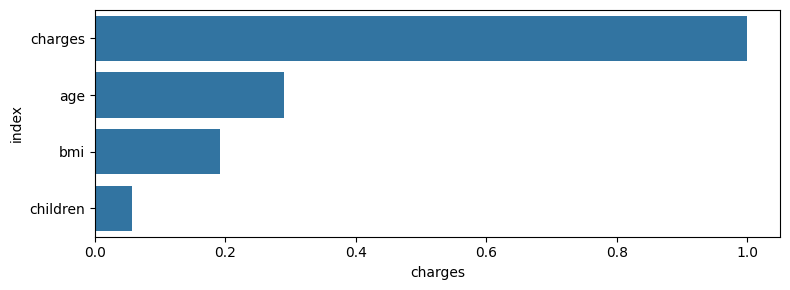

In [25]:
# Advanced feature selection
plt.figure(figsize=(8,3))
sns.barplot(data = corr_data,y='index',x='charges')
plt.tight_layout()
plt.show()

- Feature selection is performed using correlation to determine which numerical variables influence insurance charges the most.

# **2. Model Building**

### **1. Data Transformation**

In [26]:
# Target Variable
X = df.drop(columns=['charges'])
y = df['charges']

- The dataset is divided into features and target, where charges is the dependent variable and the remaining columns are independent variables.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99403 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       99403 non-null  float64
 1   gender    99403 non-null  object 
 2   bmi       99403 non-null  float64
 3   children  99403 non-null  float64
 4   smoker    99403 non-null  object 
 5   region    99403 non-null  object 
 6   charges   99403 non-null  float64
dtypes: float64(4), object(3)
memory usage: 6.1+ MB


In [28]:
# Let us split the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
print('Shape of X_train = ',X_train.shape)
print('Shape of y_train = ',y_train.shape)
print('Shape of X_test = ',X_test.shape)
print('Shape of y_test = ',y_test.shape)

Shape of X_train =  (79522, 6)
Shape of y_train =  (79522,)
Shape of X_test =  (19881, 6)
Shape of y_test =  (19881,)


- The dataset is split into training and testing sets to evaluate the model’s performance on unseen data.

##### **RandomForest**

In [29]:
# Create pipeline using makepipeline

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
transformer = ColumnTransformer(transformers = [('t1',StandardScaler(),[0,2,3]),('t2',OrdinalEncoder(),[1,4,5])])
pipe = make_pipeline(transformer,RandomForestRegressor())

- Imports required tools for preprocessing and model building.
- Numerical columns → StandardScaler
- Categorical columns → OrdinalEncoder
- Different preprocessing for different column types
- Pipeline ensures preprocessing is applied consistently to both training and test data.

In [30]:
# Train the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('t1', StandardScaler(),
                                                  [0, 2, 3]),
                                                 ('t2', OrdinalEncoder(),
                                                  [1, 4, 5])])),
                ('randomforestregressor', RandomForestRegressor())])

- Model learns patterns from training data.

In [31]:
best_rf = pipe.feature_names_in_
best_rf

array(['age', 'gender', 'bmi', 'children', 'smoker', 'region'],
      dtype=object)

- Shows which features influence predictions the most.

In [32]:
model = pipe.named_steps["randomforestregressor"]
importances = model.feature_importances_
sorted_values = np.sort(importances)

<Axes: ylabel='None'>

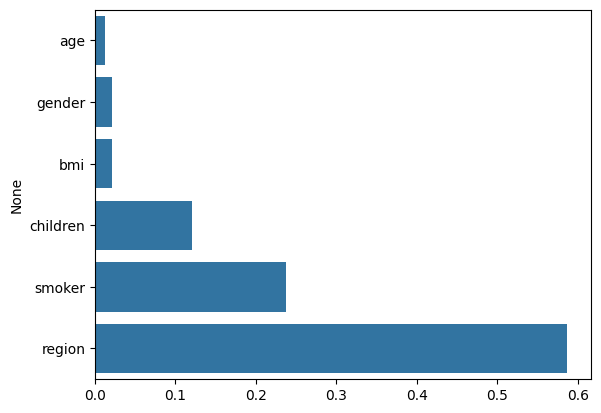

In [33]:
sns.barplot(x = sorted_values,y = X_train.columns)

- sorted_values → represents feature importance scores from the trained model
- X_train.columns → represents the feature names
- The bar plot helps compare which features are more influential

In [34]:
# Now make prediction
# Predict on test data

y_pred = pipe.predict(X_test)

- Predictions made on unseen test data.

In [35]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('R2 Score', r2_score(y_test, y_pred))
print('Mean Absolute Error', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', mean_squared_error(y_test, y_pred))

R2 Score 0.8468402584011181
Mean Absolute Error 2140.109713691103
Mean Squared Error 22373121.341110222


- Used to measure model performance.

#### **XGboost**

In [36]:
# Create pipeline using makepipeline

from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
transformer = ColumnTransformer(transformers = [('t1',StandardScaler(),[0,2,3]),('t2',OrdinalEncoder(),[1,4,5])])
pipe = make_pipeline(transformer,XGBRegressor())

In [37]:
# Train the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('t1', StandardScaler(),
                                                  [0, 2, 3]),
                                                 ('t2', OrdinalEncoder(),
                                                  [1, 4, 5])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metri...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [38]:
# Now make prediction
# Predict on test data

y_pred = pipe.predict(X_test)

In [39]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('R2 Score', r2_score(y_test, y_pred))
print('Mean Absolute Error', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', mean_squared_error(y_test, y_pred))

R2 Score 0.8433876093361652
Mean Absolute Error 2657.5816212699365
Mean Squared Error 22877474.088588532


In [40]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [41]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [42]:
# Implementing the pipeline
# Implementing the pipeline
lgbm = make_pipeline(transformer, LGBMRegressor())
rmf  = make_pipeline(transformer, RandomForestRegressor())
dt   = make_pipeline(transformer, DecisionTreeRegressor())
cat  = make_pipeline(transformer, CatBoostRegressor())
knn  = make_pipeline(transformer, KNeighborsRegressor())
xgb  = make_pipeline(transformer, XGBRegressor())

In [43]:
# Fitting lgbm
lgbm.fit(X_train,y_train)

# Fitting random forest
rmf.fit(X_train,y_train)

# # fitting decission ttree
dt.fit(X_train,y_train)

# fitting cataboost
cat.fit(X_train,y_train)

# fitting the k-n-n
knn.fit(X_train,y_train)

# fitting xgbm
xgb.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 79522, number of used features: 6
[LightGBM] [Info] Start training from score 13268.533378
Learning rate set to 0.081744
0:	learn: 11340.9368851	total: 76.8ms	remaining: 1m 16s
1:	learn: 10650.8068410	total: 101ms	remaining: 50.6s
2:	learn: 10030.5213935	total: 130ms	remaining: 43s
3:	learn: 9469.9945148	total: 152ms	remaining: 37.9s
4:	learn: 8970.9227152	total: 178ms	remaining: 35.5s
5:	learn: 8522.2018974	total: 205ms	remaining: 33.9s
6:	learn: 8129.3050402	total: 231ms	remaining: 32.8s
7:	learn: 7771.1186453	total: 263ms	remaining: 32.6s
8:	learn: 7458.7812655	total: 289ms	remaining: 31.8s
9:	learn: 7181.9880150	total: 298ms	remaining: 29.5s
10:	learn: 6942.4408417	total: 308ms	remaining: 27.7s
11:	learn: 6729.0280031	total: 318ms	re

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('t1', StandardScaler(),
                                                  [0, 2, 3]),
                                                 ('t2', OrdinalEncoder(),
                                                  [1, 4, 5])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metri...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [44]:
# Predict from each model
lgbm_pred = lgbm.predict(X_test)
rmf_pred = rmf.predict(X_test)
dt_pred = dt.predict(X_test)
cat_pred = cat.predict(X_test)
knn_pred = knn.predict(X_test)
xgb_pred = xgb.predict(X_test)

##### **Evaluation Function (COMPLETE VERSION)**

In [45]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

- Average absolute difference between actual and predicted values(MAE)
- Lower MAE = better model
- Squares the errors before averaging, Penalizes large errors more
- Square root of MSE, Same unit as target variable (charges)
- Measures how much variance in the target is explained, Range: 0 to 1, Higher = better

In [46]:
def evaluate(name, y_test, y_pred):
    print(f"\n{name} Results:")
    print("-" * 40)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2  = r2_score(y_test, y_pred)

    print(f"MAE  : {mae}")
    print(f"MSE  : {mse}")
    print(f"RMSE : {rmse}")
    print(f"R2   : {r2}")

evaluate("LGBM", y_test, lgbm_pred)
evaluate("RandomForest", y_test, rmf_pred)
evaluate("DecisionTree", y_test, dt_pred)
evaluate("CatBoost", y_test, cat_pred)
evaluate("KNN", y_test, knn_pred)
evaluate("XGBoost", y_test, xgb_pred)


LGBM Results:
----------------------------------------
MAE  : 2699.0639019547793
MSE  : 23770800.658436656
RMSE : 4875.530807864581
R2   : 0.8372721610482257

RandomForest Results:
----------------------------------------
MAE  : 2140.7102792279993
MSE  : 22284844.649202082
RMSE : 4720.68264652498
R2   : 0.8474445744067266

DecisionTree Results:
----------------------------------------
MAE  : 2233.440754244803
MSE  : 36677016.54195086
RMSE : 6056.155260720358
R2   : 0.7489200415741206

CatBoost Results:
----------------------------------------
MAE  : 2693.581539152647
MSE  : 23175883.967016608
RMSE : 4814.133771200859
R2   : 0.8413447839666617

KNN Results:
----------------------------------------
MAE  : 2138.13546593615
MSE  : 22418822.77518533
RMSE : 4734.851927482562
R2   : 0.846527399961434

XGBoost Results:
----------------------------------------
MAE  : 2657.5816212699365
MSE  : 22877474.088588532
RMSE : 4783.0402557984535
R2   : 0.8433876093361652


- Highest R² score
- Low MAE and RMSE
- Stable and less overfitting than Decision Tree

# **Hyperparameter Tuning**

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [0, 2, 3]),
        ('cat', OrdinalEncoder(), [1, 4, 5])
    ]
)

# Pipeline with named steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Hyperparameters
param_dist_rf = {
    'model__n_estimators': [200, 300, 500],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2']
}

random_search_rf = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist_rf,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               [0,
                                                                                2,
                                                                                3]),
                                                                              ('cat',
                                                                               OrdinalEncoder(),
                                                                               [1,
                                                                                4,
                                                                                5])])),
                                             ('model',
                                              RandomForestRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 10, 20, 30],
                                        'model__max_features': ['sqrt', 'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [200, 300, 500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [48]:
best_model = random_search_rf.best_estimator_

- This extracts the best pipeline (preprocessing + XGBoost with tuned parameters).

In [49]:
y_pred = best_model.predict(X_test)

- Makes predictions on unseen test data.

In [50]:
evaluate("RandomForest", y_test, y_pred)


RandomForest Results:
----------------------------------------
MAE  : 2207.4602817979244
MSE  : 20380723.34689668
RMSE : 4514.501450536557
R2   : 0.8604796231237847


In [51]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score (Accuracy):", r2)

R2 Score (Accuracy): 0.8604796231237847


- R² closer to 1 → better model
- R² around 0.84–0.86 is very good for insurance data

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R2  :", r2)

MAE : 2207.4602817979244
MSE : 20380723.34689668
RMSE: 4514.501450536557
R2  : 0.8604796231237847


- After hyperparameter tuning, the Random Forest model demonstrated improved accuracy with reduced MAE and RMSE, indicating better generalization.

In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Preprocessing (SAME as Random Forest for fair comparison)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [0, 2, 3]),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), [1, 4, 5])
    ]
)

# Pipeline with named steps
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor())
])

# Hyperparameters for KNN
param_dist_knn = {
    'model__n_neighbors': [3, 5, 7, 9, 11],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]   # 1 = Manhattan, 2 = Euclidean
}

# Randomized Search
random_search_knn = RandomizedSearchCV(
    estimator=pipeline_knn,
    param_distributions=param_dist_knn,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search_knn.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               [0,
                                                                                2,
                                                                                3]),
                                                                              ('cat',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               [1,
                                                                                4,
                                                                                5])])),
                                             ('model', KNeighborsRegressor())]),
                   n_jobs=-1,
                   param_distributions={'model__n_neighbors': [3, 5, 7, 9, 11],
                                        'model__p': [1, 2],
                                        'model__weights': ['uniform',
                                                           'distance']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [56]:
best_knn_model = random_search_knn.best_estimator_

In [57]:
y_pred_knn = best_knn_model.predict(X_test)
evaluate("KNN (Tuned)", y_test, y_pred_knn)


KNN (Tuned) Results:
----------------------------------------
MAE  : 2188.350813576833
MSE  : 21074584.493338827
RMSE : 4590.706317478698
R2   : 0.8557296558628772


# **Pickle file**

In [53]:
import pickle

# pipe OR best_model (Pipeline with preprocessing + RF)
with open("RF_model.pkl", "wb") as f:
    pickle.dump(pipe, f)

In [54]:
import pandas as pd
import pickle

# Load your trained model
with open("RF_model.pkl", "rb") as f:
    model = pickle.load(f)

# Columns EXACTLY as used during training
columns = [
    'age', 'gender', 'bmi', 'children',
    'smoker', 'region'
]

# Sample input - match your dataset values
sample_input = pd.DataFrame([[
    35,            # age
    "male",        # gender
    28.5,          # bmi
    2,             # children
    "no",          # smoker (yes/no)
    "southwest"    # region
]], columns=columns)

# Predict
prediction = model.predict(sample_input)

print("Predicted Medical Charges:", prediction[0])

Predicted Medical Charges: 7316.8975
